## Section 2: Surveys

In [3]:
## Load survey data.
surveys = read_csv(os.path.join('data','surveys.csv'))

## Apply rejections.
reject = read_csv(os.path.join('data','reject.csv'))
surveys = surveys[~surveys.Subject.isin(reject.query('Reject == 1').Subject)].reset_index(drop=True)

#### 2.1 Cross-Sectional Correlation Structure

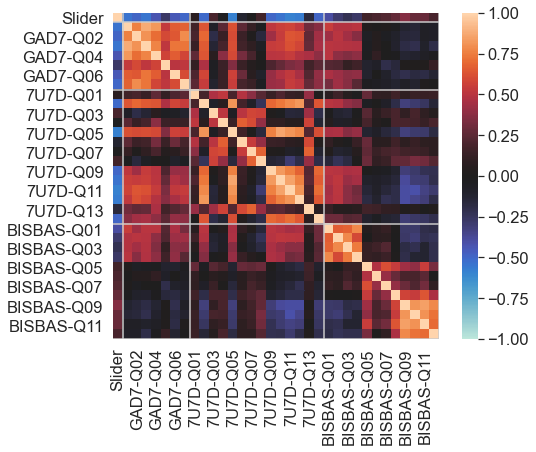

In [4]:
## Gather item columns.
cols = np.concatenate([surveys.filter(regex=f'{s}-Q').columns[:-1] for s in ['GAD7','7U7D','BISBAS']])
cols = np.append('Slider',cols)

## Compute correlation matrix.
corr = surveys.query('Session==1')[cols].corr(method='spearman')

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,6))

## Plot.
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, ax=ax)
ax.vlines(np.cumsum([1,7,14,12]), 0, len(cols), color='0.8')
ax.hlines(np.cumsum([1,7,14,12]), 0, len(cols), color='0.8')

#### 2.2 Affective Slider

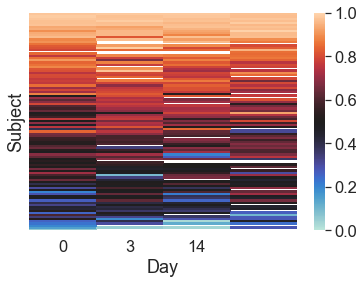

In [5]:
## Make pivot table.
mood = surveys.pivot_table('Slider','Subject','Session').values
mood = mood[np.argsort(np.nanmean(mood, axis=1))]

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot ratings.
sns.heatmap(mood, vmin=0, vmax=1, center=0.5, xticklabels=[0,3,14], yticklabels=[], ax=ax)
ax.set(xlabel='Day', ylabel='Subject')
ax.invert_yaxis()

#### 2.3 Generalized Anxiety Disorder Scale

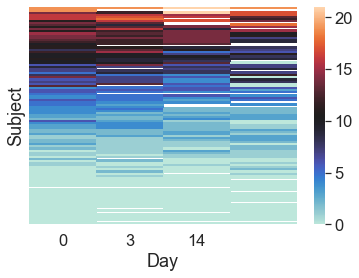

In [6]:
## Compute sum scores.
surveys['GAD7'] = surveys[surveys.filter(regex='GAD7-Q').columns[:-1]].sum(axis=1)

## Make pivot table.
gad7 = surveys.pivot_table('GAD7','Subject','Session').values
gad7 = gad7[np.argsort(np.nanmean(gad7, axis=1))]

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot scores.
sns.heatmap(gad7, vmin=0, vmax=21, center=10.5, xticklabels=[0,3,14], yticklabels=[], ax=ax)
ax.set(xlabel='Day', ylabel='Subject')
ax.invert_yaxis()